### Data Reading

## Load data

1. CSV File

In [ ]:
path_csv = '/Volumes/workspace/default/csvfile/BigMart Sales.csv'

In [ ]:
df_csv = spark.read.format('csv')\
    .option('header',True)\
        .option('inferSchema',True)\
            .load(path_csv)

In [ ]:
df_csv.display()

2. JSON file

In [ ]:
path_json = '/Volumes/workspace/learning/jsonfile/drivers.json'

In [ ]:
df_json = spark.read.format('json')\
    .option('header',True)\
        .option('multiline',False)\
            .load(path_json)

In [ ]:
df_json.display()

### SCHEMA - DDL and StructType()


###Schema Defination

--> To Use for Change the data type

1. DDL Schema

In [ ]:
df_csv.printSchema()

In [ ]:
schema_csv = '''
Item_Identifier string,
Item_Weight string,
Item_Fat_Content string,
Item_Visibility double,
Item_Type string,
Item_MRP double,
Outlet_Identifier string,
Outlet_Establishment_Year integer,
Outlet_Size string,
Outlet_Location_Type string,
Outlet_Type string,
Item_Outlet_Sales double
'''

In [ ]:
df = spark.read.format('csv')\
    .schema(schema_csv)\
        .option('header',True)\
            .load(path_csv)

In [ ]:
df.display()

2. StructType() Schema

In [ ]:
from pyspark.sql.types import *
from pyspark.sql.functions import *


In [ ]:
schema_struct = StructType([
    StructField('Item_Identifier',StringType(),True),
    StructField('Item_Weight',StringType(),True),
    StructField('Item_Fat_Content',StringType(),True),
    StructField('Item_Visibility',StringType(),True),
    StructField('Item_Type',StringType(),True),
    StructField('Item_MRP',DoubleType(),True),
    StructField('Outlet_Identifier',StringType(),True),
    StructField('Outlet_Establishment_Year',IntegerType(),True),
    StructField('Outlet_Size',StringType(),True),
    StructField('Outlet_Location_Type',StringType(),True),
    StructField('Outlet_Type',StringType(),True),
    StructField('Item_Outlet_Sales',DoubleType(),True)

])

In [ ]:
df= spark.read.format('csv')\
    .schema(schema_struct)\
        .option('header',True)\
            .option('inferSchema',True)\
                .load(path_csv)

In [ ]:
df.display()

### Data Transormation

### SELECT

Method 1

In [ ]:
df_csv.select('Item_Identifier','Item_Weight','Item_Fat_Content').display()

Method 2 --> By using Col()

In [ ]:
df_csv.select(col('Item_Identifier'),col('Item_Weight'),col('Item_Fat_Content')).display()

### ALIAS

--> Use for rename the column name


In [ ]:
df_csv.select(col('Item_Identifier').alias('Item_ID')).display()

FILTER / WHERE

CASE 1: Filter the data with fat content = Regular

In [ ]:
df_csv.printSchema()

In [ ]:
df_csv.filter(col('Item_Fat_Content') == 'Regular').display()

CASE 2: Slice the data with item type = Soft Drinks and weight < 10

In [ ]:
df_csv.filter((col('Item_Type') == 'Soft Drinks') & (col('Item_Weight') < 10)).display()

CASE 3: Feth the data Tier in (Tier1 or Tier2) and Outlet Size is Null

In [ ]:
df_csv.filter((col('Outlet_Size').isNull())& col('Outlet_Location_Type').isin('Tier 1','Tier 2')).display()

### withColumnRenamed

--> use to rename column in data frame level

In [ ]:
df_csv.withColumnRenamed('Item_Weight','Item_Wt').display()

###withColumn

Case 1 : Createa new column

In [ ]:
df= df_csv.withColumn('Flag',lit("New"))

In [ ]:
df.display()

In [ ]:
df = df.withColumn('multiply',col('Item_Weight')*col('Item_MRP'))

In [ ]:
df.display()

Case 2 : Modify the existing one

In [ ]:
df_csv.withColumn('Item_Fat_Content',regexp_replace(col('Item_Fat_Content'),"Regular",'Reg'))\
    .withColumn('Item_Fat_Content',regexp_replace(col('Item_Fat_Content'),"Low Fat",'LF'))\
        .display()

### Type Casting

In [ ]:
df = df_csv.withColumn('Item_Weight', col('Item_Weight').cast(StringType()))

In [ ]:
df.display()

In [ ]:
df.printSchema()

### Sort/ orderBy

Case 1: sort data by descending order

In [ ]:
df.sort(col('Item_weight').desc()).display()

case 2 : Sort by Assending

In [ ]:
df.sort(col('Item_Visibility').asc()).display()

Case 3: sorting based on multiple columns

In [ ]:
df.sort(['Item_Weight','Item_Visibility'],ascending=[1,0]).display()

### Limit

--> use for specific data to display

In [ ]:
df.limit(10).display()

### DROP

case 1: Drop 1 Column

In [ ]:
df.drop("Item_visibility").display()

Case 2: Drop Multiple Columns as a time

In [ ]:
df.drop("Item_visibility","Item_Type").display()

### DROP_DUPLICATES

Case 1 : Drop all the duplicate values in the data

In [ ]:
df.dropDuplicates().display()

Case 2: Drop duplicates in perticular columns

In [ ]:
df.drop_duplicates(subset=['Item_Type']).display()

### D_dup Data

In [ ]:
df.distinct().display()

### UNION and UNION BY NAME

Prepared the data frames

In [ ]:
data1 = [('1','cad'),
         ('2','bad'),]
schema1 = 'id string, name string'
df1 = spark.createDataFrame(data1,schema1)

data2 = [('3','mad'),
         ('4','dad'),]
schema2 = 'id string, name string'
df2 = spark.createDataFrame(data2,schema2)

In [ ]:
df1.display()

In [ ]:
df2.display()

### Union

In [ ]:
df1.union(df2).display()

###Union by Name

In [ ]:
data1 = [('cad','1'),
         ('bad','2'),]
schema1 = 'name string, id string'
df1 = spark.createDataFrame(data1,schema1)
df1.display()

In [ ]:
df1.union(df2).display( )

In [ ]:
df1.unionByName(df2).display()

### STRING FUNCTIONS

1. Initcap()
2. lower()
3. upper()

In [ ]:
df.select(initcap('Item_Type')).display()

### Date Functions

In [2]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

In [ ]:
df = spark.read.format('csv')\
    .option('header','true')\
        .option('inferSchema','true')\
            .load(path_csv)

In [ ]:
df.display()

1. Current_date()

In [ ]:
df =df.withColumn('Curr_date',current_date())

In [ ]:
df.display()

2. Date_add()

In [ ]:
df = df.withColumn('week_after',date_add('Curr_date', 7))

In [ ]:
df.display()

3. Date_sub()

In [ ]:
df = df.withColumn('week_before', date_sub('Curr_date', 7))

In [ ]:
df.display()

### DATEDIFF

--> to give the date difference

In [ ]:
df = df.withColumn('diff', datediff('Curr_date','week_after'))

In [ ]:
df.display()


Date_Format()

In [ ]:
df = df.withColumn('week_before', date_format('week_before','dd-MM-yyyy'))

In [ ]:
df.display()

### Handeling NULLS

Dropping Nulls

In [ ]:
df.dropna('all').display()

In [ ]:
df.dropna('any').display()

In [ ]:
df.display()

Filling the Null Values

replace all the null values

In [ ]:
df.fillna('NotAvailable').display()

In [ ]:
df.fillna(value='NOtaVailablle', subset='Outlet_Size').display()

### SPLIT and Indexing

1. Split

In [ ]:
df.withColumn('outlet_type', split('outlet_type', ' ')).display()

Indexing

In [ ]:
df.withColumn('outlet_type', split('outlet_type', ' ')[1]).display()

## EXPLODE

In [ ]:
df_exp = df.withColumn('outlet_type', split('outlet_type', ' '))


In [ ]:
df_exp.display()

In [ ]:
df_exp.withColumn('outlet_type', explode('outlet_type'))

In [ ]:
df_exp.display()

### ARRAY_CONTAINS

In [ ]:
df_exp.withColumn('type_flag', array_contains('outlet_type', 'Type1')).display()

### Group_By

Case 1 : Find SUM

In [ ]:
df.groupBy('Item_Type').agg(sum('Item_MRP')).display()

Case 2 : find AVG

In [ ]:
df.groupBy('Item_Type').agg(avg('Item_MRP')).display()

Case 3:

In [ ]:
df.groupBy('Item_Type','outlet_Size').agg(sum('Item_MRP').alias('Total_MRP')).display()

Case4:

In [20]:
df.groupBy('Item_Type','outlet_Size').agg(sum('Item_MRP').alias('Total_MRP'),avg('Item_MRP').alias('Avg_MRP')).show()

+--------------------+-----------+------------------+------------------+
|           Item_Type|outlet_Size|         Total_MRP|           Avg_MRP|
+--------------------+-----------+------------------+------------------+
|       Starchy Foods|     Medium| 7124.136199999997| 148.4195041666666|
|Fruits and Vegeta...|     Medium|59047.217200000014| 142.9714702179177|
|       Starchy Foods|       NULL|         6040.6402|140.48000465116277|
|              Breads|       NULL|        10011.5004|139.04861666666667|
|        Baking Goods|       NULL|23433.838799999994|126.66939891891889|
|Fruits and Vegeta...|       NULL|49758.730999999985|142.57516045845267|
|        Frozen Foods|       High|12588.291000000001|         136.82925|
|         Soft Drinks|       High| 6456.165199999999|131.75847346938772|
|           Breakfast|      Small|3917.0407999999998|130.56802666666667|
|                Meat|     Medium| 20326.45059999999|136.41913154362408|
|Fruits and Vegeta...|       High| 20671.3475999999

### Collet_List

In [17]:
data = [('User 1', 'Book 1'),
        ('User 2', 'Book 2'),
        ('User 3', 'Book 1'),
        ('User 3', 'Book 2'),
        ('User 1', 'Book 3')]

schema = 'user string, book string'

df_book = spark.createDataFrame(data, schema)

df_book.show()

+------+------+
|  user|  book|
+------+------+
|User 1|Book 1|
|User 2|Book 2|
|User 3|Book 1|
|User 3|Book 2|
|User 1|Book 3|
+------+------+



In [19]:
df_book.groupBy('user').agg(collect_list('book')).show( )

+------+------------------+
|  user|collect_list(book)|
+------+------------------+
|User 2|          [Book 2]|
|User 1|  [Book 1, Book 3]|
|User 3|  [Book 1, Book 2]|
+------+------------------+



Example

In [55]:
!pip install pyspark

In [56]:
from pyspark.sql import SparkSession # Import the SparkSession class from the pyspark.sql module
from pyspark.sql.functions import *
from pyspark.sql.types import *

spark = SparkSession.builder.appName('Practice').getOrCreate()

In [57]:
path = ('/content/sample_data/BigMart Sales.csv')

In [58]:
df = spark.read.format('csv')\
.option('header',True)\
.option('inferSchema',True)\
.load(path)

In [59]:
df.show()

+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|
+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|          FDA15|        9.3|         Low Fat|    0.016047301|               Dairy|249.8092|           OUT049|                     1999|     Medium|              Tier 1|Supermarket Type1|         3735.138|
|          DRC01|       5.92|         Regular|    0.019278216|         Soft Drinks| 48.2692|           OUT018|                     2009|     Medium|              Tier 3|Superma

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### PIVOT

In [13]:
df.groupBy('Item_Type').pivot('Outlet_Size').agg(avg('Item_MRP')).show()

+--------------------+------------------+------------------+------------------+------------------+
|           Item_Type|              null|              High|            Medium|             Small|
+--------------------+------------------+------------------+------------------+------------------+
|       Starchy Foods|140.48000465116277|158.15707368421053| 148.4195041666666| 150.2701736842105|
|              Breads|139.04861666666667|         133.75896| 140.8610385542169| 145.5236507042254|
|        Baking Goods|126.66939891891889|129.20204383561642|126.17856847290639|125.21336363636368|
|Fruits and Vegeta...|142.57516045845267|145.57287042253515| 142.9714702179177|148.31336951219507|
|                Meat|139.29453448275865| 137.2447902439025|136.41913154362408|145.69925042016808|
|         Hard Drinks| 134.3875333333333| 141.9275217391304|142.83769599999994|        129.758784|
|         Soft Drinks|133.42344360902257|131.75847346938772| 128.2696817518248| 132.8550428571429|
|         

### WHEN - OTHERWISE

--> Used for conditionL FORMATING

Case 1:

In [14]:
df = df.withColumn('veg_flag',when(col('Item_Type')== 'Meat', 'Non-Veg').otherwise('Veg'))

In [15]:
df.show()

+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+--------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|veg_flag|
+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+--------+
|          FDA15|        9.3|         Low Fat|    0.016047301|               Dairy|249.8092|           OUT049|                     1999|     Medium|              Tier 1|Supermarket Type1|         3735.138|     Veg|
|          DRC01|       5.92|         Regular|    0.019278216|         Soft Drinks| 48.2692|           OUT018|                     2009|    

Case 2:

In [16]:
df.withColumn('veg_exp_flag', when(((col('veg_flag')== 'Veg')&(col('Item_MRP')<100)),'veg_Inexpensive')\
              .when(((col('veg_flag')== 'Veg')&(col('Item_MRP')>100)),'veg_Expensive')\
              .otherwise('Non-veg')).show()

+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+--------+---------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|veg_flag|   veg_exp_flag|
+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+--------+---------------+
|          FDA15|        9.3|         Low Fat|    0.016047301|               Dairy|249.8092|           OUT049|                     1999|     Medium|              Tier 1|Supermarket Type1|         3735.138|     Veg|  veg_Expensive|
|          DRC01|       5.92|         Regular|    0.019278216|         Soft 

In [17]:
df.show()

+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+--------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|veg_flag|
+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+--------+
|          FDA15|        9.3|         Low Fat|    0.016047301|               Dairy|249.8092|           OUT049|                     1999|     Medium|              Tier 1|Supermarket Type1|         3735.138|     Veg|
|          DRC01|       5.92|         Regular|    0.019278216|         Soft Drinks| 48.2692|           OUT018|                     2009|    

### JOINS


1. Inner Join
2. Left Join
3. Right Join
4. Full Join
5. Anti Join

Data frame

In [31]:
df1 = [('1','sam','d01'),
       ('2','ram','d02'),
       ('3','cam','d03'),
       ('4','dam','d03'),
       ('5','eam','d05'),
       ('6','Ram','d06')
       ]

# Correcting the typo: changing 'shcemaj1' to 'schemaj1'
schemaj1 = 'emp_ID string, emp_name string, dept_ID string'

df1 = spark.createDataFrame(df1,schemaj1)

df2 = [('d01','hr'),
       ('d02','scm'),
       ('d03','ele'),
       ('d04','finanance'),
       ('d05','mech')]

schemaj2 = 'dept_ID string, dept_name string'

df2 = spark.createDataFrame(df2,schemaj2)

In [32]:
df1.show()
df2.show()

+------+--------+-------+
|emp_ID|emp_name|dept_ID|
+------+--------+-------+
|     1|     sam|    d01|
|     2|     ram|    d02|
|     3|     cam|    d03|
|     4|     dam|    d03|
|     5|     eam|    d05|
|     6|     Ram|    d06|
+------+--------+-------+

+-------+---------+
|dept_ID|dept_name|
+-------+---------+
|    d01|       hr|
|    d02|      scm|
|    d03|      ele|
|    d04|finanance|
|    d05|     mech|
+-------+---------+



1. Inner Join

--> it show all the matching data in df1 and df2

In [33]:
df1.join(df2,df1['dept_ID'] == df2['dept_ID'],'inner').show()

+------+--------+-------+-------+---------+
|emp_ID|emp_name|dept_ID|dept_ID|dept_name|
+------+--------+-------+-------+---------+
|     1|     sam|    d01|    d01|       hr|
|     2|     ram|    d02|    d02|      scm|
|     3|     cam|    d03|    d03|      ele|
|     4|     dam|    d03|    d03|      ele|
|     5|     eam|    d05|    d05|     mech|
+------+--------+-------+-------+---------+



Left join

--> show the all the data in df1 and maching data in df2

In [35]:
df1.join(df2, df1['dept_ID']== df2['dept_ID'],'left').show()

+------+--------+-------+-------+---------+
|emp_ID|emp_name|dept_ID|dept_ID|dept_name|
+------+--------+-------+-------+---------+
|     1|     sam|    d01|    d01|       hr|
|     3|     cam|    d03|    d03|      ele|
|     2|     ram|    d02|    d02|      scm|
|     4|     dam|    d03|    d03|      ele|
|     6|     Ram|    d06|   NULL|     NULL|
|     5|     eam|    d05|    d05|     mech|
+------+--------+-------+-------+---------+



Right join

--> show all the data in df2 and matching in df1

In [37]:
df1.join(df2, df1['dept_ID']==df2['dept_ID'],'right').show()

+------+--------+-------+-------+---------+
|emp_ID|emp_name|dept_ID|dept_ID|dept_name|
+------+--------+-------+-------+---------+
|     1|     sam|    d01|    d01|       hr|
|     2|     ram|    d02|    d02|      scm|
|     4|     dam|    d03|    d03|      ele|
|     3|     cam|    d03|    d03|      ele|
|  NULL|    NULL|   NULL|    d04|finanance|
|     5|     eam|    d05|    d05|     mech|
+------+--------+-------+-------+---------+



Full Join

--> dhow all the  data in df1 & df2

In [38]:
df1.join(df2, df1['dept_ID']==df2['dept_ID'],'full').show()

+------+--------+-------+-------+---------+
|emp_ID|emp_name|dept_ID|dept_ID|dept_name|
+------+--------+-------+-------+---------+
|     1|     sam|    d01|    d01|       hr|
|     2|     ram|    d02|    d02|      scm|
|     3|     cam|    d03|    d03|      ele|
|     4|     dam|    d03|    d03|      ele|
|  NULL|    NULL|   NULL|    d04|finanance|
|     5|     eam|    d05|    d05|     mech|
|     6|     Ram|    d06|   NULL|     NULL|
+------+--------+-------+-------+---------+



Anti Join

--> data avaialble in df1 but not in df2

In [39]:
df1.join(df2,df1['dept_ID']==df2['dept_ID'],'anti').show()

+------+--------+-------+
|emp_ID|emp_name|dept_ID|
+------+--------+-------+
|     6|     Ram|    d06|
+------+--------+-------+



### Window Functins

1. Row Number()
2. Rank()
3.

In [65]:
from pyspark.sql.window import Window

In [53]:
df.withColumn('rowCol', row_number().over(Window.orderBy(col('Item_Identifier')))).show()

+---------------+-----------+----------------+---------------+-----------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|  Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|rowCol|
+---------------+-----------+----------------+---------------+-----------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+------+
|          DRA12|       11.6|         Low Fat|    0.041177505|Soft Drinks|140.3154|           OUT017|                     2007|       NULL|              Tier 2|Supermarket Type1|        2552.6772|     1|
|          DRA12|       11.6|         Low Fat|            0.0|Soft Drinks|141.6154|           OUT045|                     2002|       NULL|              Tier 2|Supermarket Type1|      

###Rank()
DeseRank()

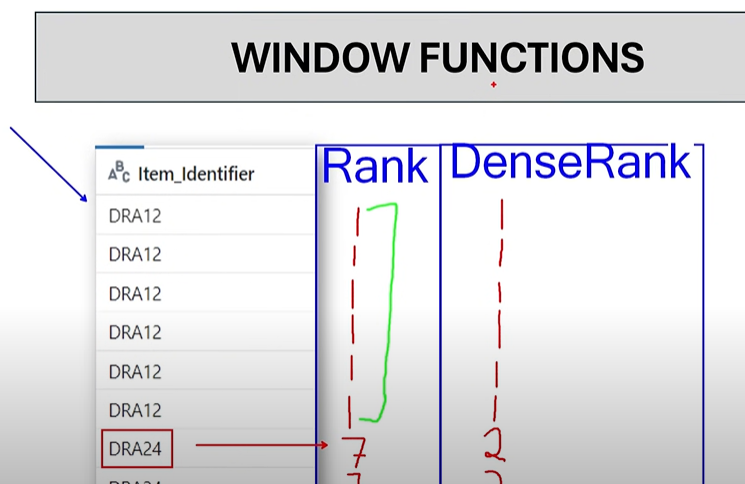

###Rank()

In [66]:
df.withColumn('rank',rank().over(Window.orderBy('Item_Identifier'))).show()

+---------------+-----------+----------------+---------------+-----------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+----+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|  Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|rank|
+---------------+-----------+----------------+---------------+-----------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+----+
|          DRA12|       11.6|         Low Fat|    0.041177505|Soft Drinks|140.3154|           OUT017|                     2007|       NULL|              Tier 2|Supermarket Type1|        2552.6772|   1|
|          DRA12|       11.6|         Low Fat|            0.0|Soft Drinks|141.6154|           OUT045|                     2002|       NULL|              Tier 2|Supermarket Type1|        3829.0

Rank with Desc order

In [67]:
df.withColumn('rank_desc',rank().over(Window.orderBy(desc('Item_Identifier')))).show()

+---------------+-----------+----------------+---------------+------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+---------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|         Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|rank_desc|
+---------------+-----------+----------------+---------------+------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+---------+
|          NCZ54|      14.65|         Low Fat|    0.083359391|         Household|161.9552|           OUT046|                     1997|      Small|              Tier 1|Supermarket Type1|        4711.2008|        1|
|          NCZ54|       NULL|         Low Fat|    0.082955719|         Household|164.0552|           OUT027|                     1985|     Mediu

### Densc Rank()

In [69]:
df.withColumn('dense_Rank',dense_rank().over(Window.orderBy('Item_Identifier'))).show()

+---------------+-----------+----------------+---------------+-----------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+----------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|  Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|dense_Rank|
+---------------+-----------+----------------+---------------+-----------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+----------+
|          DRA12|       11.6|         Low Fat|    0.041177505|Soft Drinks|140.3154|           OUT017|                     2007|       NULL|              Tier 2|Supermarket Type1|        2552.6772|         1|
|          DRA12|       11.6|         Low Fat|            0.0|Soft Drinks|141.6154|           OUT045|                     2002|       NULL|              Tier 2|Supermar

### Cumulative Sum

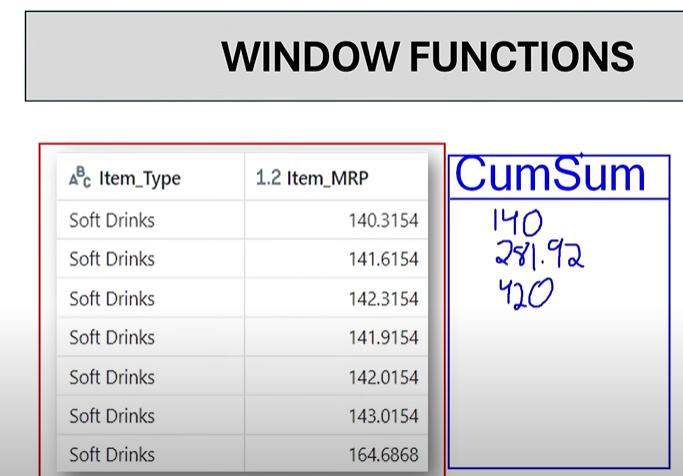

In [70]:
df.withColumn('cum_sum', sum('Item_MRP').over(Window.orderBy('Item_Type'))).show(

)

+---------------+-----------+----------------+---------------+------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+-----------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|   Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|          cum_sum|
+---------------+-----------+----------------+---------------+------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+-----------------+
|          FDP36|     10.395|         Regular|            0.0|Baking Goods| 51.4008|           OUT018|                     2009|     Medium|              Tier 3|Supermarket Type2|         556.6088|81894.73640000001|
|          FDW12|       NULL|         Regular|    0.035399923|Baking Goods|144.5444|           OUT027|                     1985|     Med

In [71]:
df.withColumn('cum_sum', sum('Item_MRP').over(Window.orderBy('Item_Type').rowsBetween(Window.unboundedPreceding,Window.currentRow))).show()

+---------------+-----------+----------------+---------------+------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+------------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|   Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|           cum_sum|
+---------------+-----------+----------------+---------------+------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+------------------+
|          FDP36|     10.395|         Regular|            0.0|Baking Goods| 51.4008|           OUT018|                     2009|     Medium|              Tier 3|Supermarket Type2|         556.6088|           51.4008|
|          FDW12|       NULL|         Regular|    0.035399923|Baking Goods|144.5444|           OUT027|                     1985|    

In [73]:
df.withColumn('Total_sum', sum('Item_MRP').over(Window.orderBy('Item_Type').rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing))).show()

+---------------+-----------+----------------+---------------+------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+------------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|   Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|         Total_sum|
+---------------+-----------+----------------+---------------+------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+------------------+
|          FDP36|     10.395|         Regular|            0.0|Baking Goods| 51.4008|           OUT018|                     2009|     Medium|              Tier 3|Supermarket Type2|         556.6088|1201681.4808000019|
|          FDW12|       NULL|         Regular|    0.035399923|Baking Goods|144.5444|           OUT027|                     1985|    

### User Defined Functions() UDF

Step 1

In [74]:
def my_func(x):
  return x*x

Step 2

In [75]:
my_udf = udf(my_func)

In [76]:
df.withColumn('mynew_col', my_udf(df['Item_MRP'])).show()

+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+------------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|         mynew_col|
+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+------------------+
|          FDA15|        9.3|         Low Fat|    0.016047301|               Dairy|249.8092|           OUT049|                     1999|     Medium|              Tier 1|Supermarket Type1|         3735.138|62404.636404640005|
|          DRC01|       5.92|         Regular|    0.019278216|         Soft Drinks| 48.2692|        

1. Read Data
2. Tranform Data
3. Write Data

### Data Writing

ServingLay --> Serving The data

CSV Formating

In [77]:
df.write.format('csv')\
.save('/content/sample_data/data save/data.csv')

### Data Writng Modes

1. append --> save as Copy or Create a new file --> use for not loosing data
2. Overwrite --> Use for delete a old file and save new file one
3. Error --> Use for Check the file is present it or not --> error shown when file is already is present
4. Ignore --> when old file present in strorage and ignore this file

Append

In [78]:
df.write.format('csv')\
.mode('append')\
.save('/content/sample_data/data save/data.csv')

Overwrite

In [79]:
df.write.format('csv')\
.mode('overwrite')\
.save('/content/sample_data/data save/data.csv')

Error

In [80]:
df.write.format('csv')\
.mode('error')\
.save('/content/sample_data/data save/data.csv')

AnalysisException: [PATH_ALREADY_EXISTS] Path file:/content/sample_data/data save/data.csv already exists. Set mode as "overwrite" to overwrite the existing path.

Ignore


In [81]:
df.write.format('csv')\
.mode('ignore')\
.save('/content/sample_data/data save/data.csv')

### Parquet File Format

Row-Based file Format
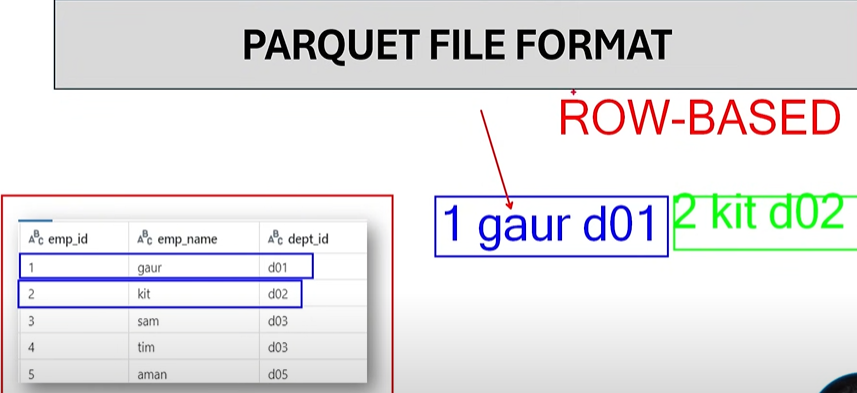

Columnar - File Format

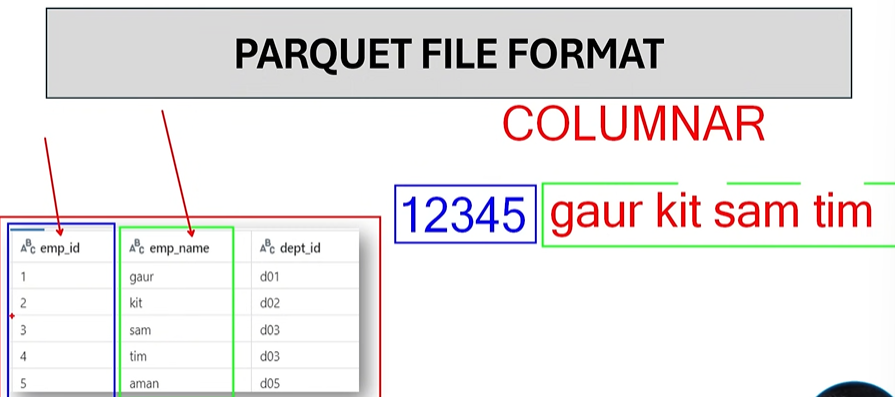

PARQUET

In [82]:
df.write.format('parquet')\
.mode('overwrite')\
.save('/content/sample_data/data save/data.csv')

### Delta Format

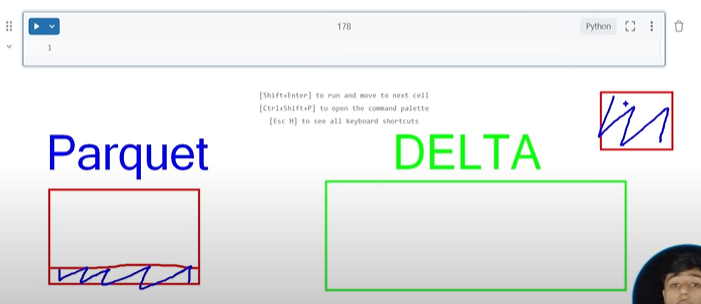

Table

In [83]:
df.write.format('parquet')\
.mode('overwrite')\
.saveAsTable('BigSale')


### Managed VS External Tables

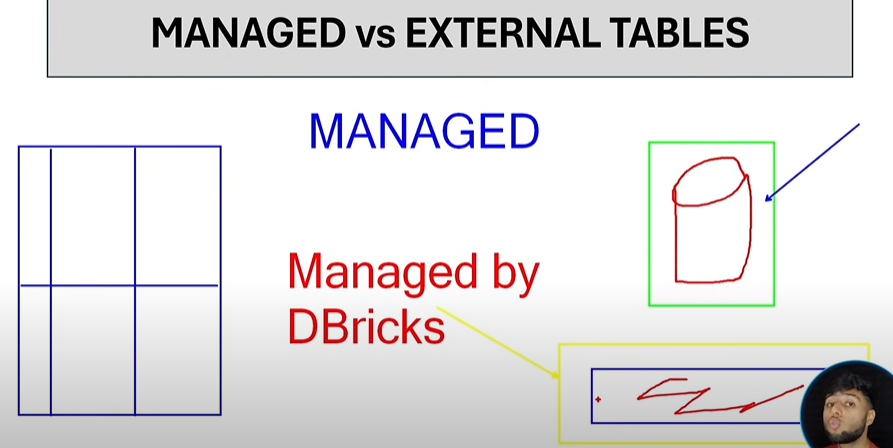

External Tables
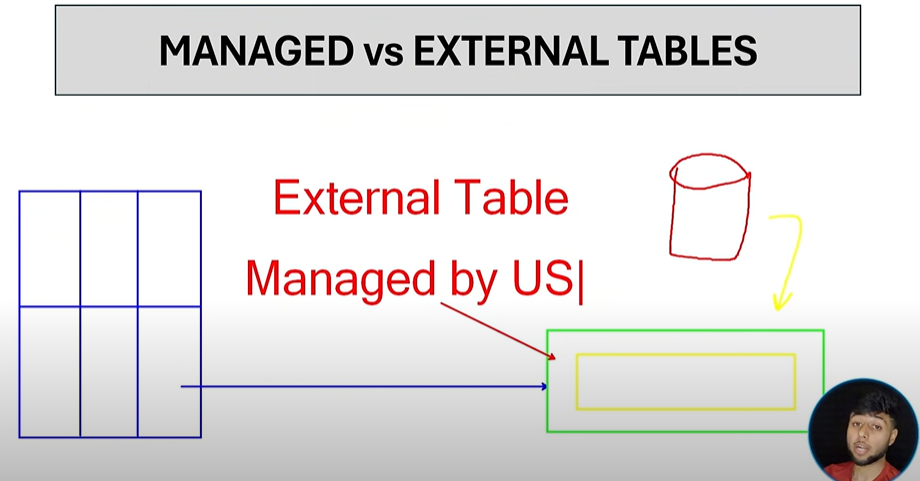

In [84]:
df.show()

+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|
+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|          FDA15|        9.3|         Low Fat|    0.016047301|               Dairy|249.8092|           OUT049|                     1999|     Medium|              Tier 1|Supermarket Type1|         3735.138|
|          DRC01|       5.92|         Regular|    0.019278216|         Soft Drinks| 48.2692|           OUT018|                     2009|     Medium|              Tier 3|Superma

### Spark SQL

CreateTemp_View

Temp_View

Create a temp_view

In [85]:
df.createTempView('my_view')

In [87]:
select * from my_view where Item_Fat_Content= 'LF'

SyntaxError: invalid syntax (<ipython-input-87-04788449122b>, line 1)

COnvert the data view to dataFrae

In [88]:
df_sql = spark.sql('select * from my_view where Item_Fat_Content= "LF"')

In [89]:
df_sql.show()

+---------------+-----------+----------------+---------------+------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|         Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|
+---------------+-----------+----------------+---------------+------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|          FDM39|       6.42|              LF|    0.089498926|             Dairy|178.1002|           OUT010|                     1998|       NULL|              Tier 3|    Grocery Store|         358.2004|
|          FDC46|       17.7|              LF|    0.195068226|       Snack Foods|185.4266|           OUT010|                     1998|       NULL|              Tier 3|    Grocery Store